<a href="https://colab.research.google.com/github/subbu27iitb/Deep-Learning/blob/main/ConvNN_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=0oIESKKokPc

https://www.youtube.com/watch?v=eifdexvpnq0

1. Load image
2. define Gx and Gy
3. Convolute using for loop

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

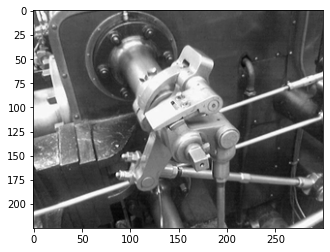

In [ ]:
#Here, Import the Image and change to gray color
image_path = "/content/Valve_original.png"
input_image= imread(image_path)
#print(input_image)
#plt.imshow(input_image) #gives color image
#plt.imshow(input_image, cmap='gray')   #still gives color image
plt.imshow(input_image[:,:,1]) #not gray image
plt.imshow(input_image[:,:,1], cmap='gray') #Why [:,:,1] or[:,:,2] or[:,:,3] should be used to get gray image


In [ ]:
image_path = "/content/Valve_original.png"
input_image= imread(image_path)
r_image=input_image[:,:,0]
g_image=input_image[:,:,1]
b_image=input_image[:,:,2]

print(input_image.shape)
print(input_image[0].shape)
print(r_image.shape)
print(r_image[0].shape)

print("********************************")
print(input_image[0])
print("********************************")
print(r_image[0])

(225, 300, 4)
(300, 4)
(225, 300)
(300,)
********************************
[[0.40784314 0.44705883 0.5058824  1.        ]
 [0.34117648 0.35686275 0.41960785 1.        ]
 [0.5254902  0.5137255  0.5529412  1.        ]
 ...
 [0.23529412 0.28235295 0.27450982 1.        ]
 [0.25490198 0.29803923 0.2784314  1.        ]
 [0.24705882 0.2901961  0.26666668 1.        ]]
********************************
[0.40784314 0.34117648 0.5254902  0.96862745 1.         0.9137255
 0.5058824  0.8862745  0.9607843  0.9607843  0.8980392  0.6117647
 0.6156863  0.6117647  0.5686275  0.52156866 0.5058824  0.84705883
 1.         0.9607843  0.7921569  0.7764706  0.84313726 0.8784314
 0.9372549  0.93333334 0.9019608  0.8627451  0.7764706  0.6431373
 0.5764706  0.56078434 0.5529412  0.56078434 0.54901963 0.56078434
 0.5764706  0.5764706  0.5529412  0.53333336 0.5411765  0.54509807
 0.54901963 0.5568628  0.5529412  0.5411765  0.53333336 0.5254902
 0.5294118  0.5176471  0.5176471  0.5176471  0.5254902  0.5254902
 0.52549

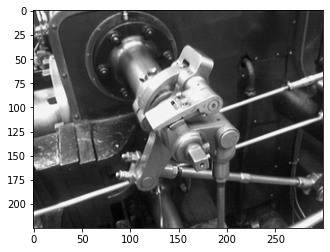

In [ ]:
#Weights & parameters to convert to color  gray scale image
gama=1.4
r_const=0.2126
g_const=0.7152
b_const=0.0722

#gray_image=(r_const*r_image**gama)+(g_const*g_image**gama)+(b_const*b_image**gama)
gray_image=r_const*r_image**gama+g_const*g_image**gama+b_const*b_image**gama
#plt.imshow(input_image, cmap='gray')
#plt.imshow(gray_image) #Not gray image ...why?
plt.imshow(gray_image, cmap='gray')


**Edge detection using Sobel operators**

In [ ]:
Gx=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(Gx)
Gy= np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
Gy

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

223
66454


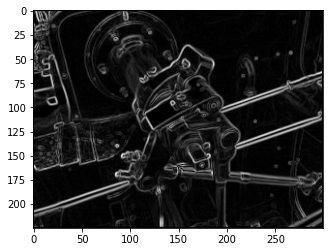

In [ ]:
nx,ny,nz = input_image.shape
sobel_matrix=np.zeros(shape=(nx,ny))
count_r=0
count_c=0
for i in range(nx-2):
  for j in range(ny-2):
    gx=np.sum(np.multiply(gray_image[i:i+3,j:j+3],Gx))
    gy=np.sum(np.multiply(gray_image[i:i+3,j:j+3],Gy))
    r=np.sqrt(gx**2+gy**2)
    sobel_matrix[i+1,j+1]=r
    count_c=count_c+1
  count_r=count_r+1

#sobel_matrix
print(count_r)
print(count_c)
plt.imshow(sobel_matrix, cmap='gray')



**Normalize the pixels to 0-255**

[[  0   0   0 ...   0   0   0]
 [  0   9 158 ...   1   3   0]
 [  0  24 110 ...   2   5   0]
 ...
 [  0  43  44 ...   1   3   0]
 [  0  70  72 ...   3   2   0]
 [  0   0   0 ...   0   0   0]]


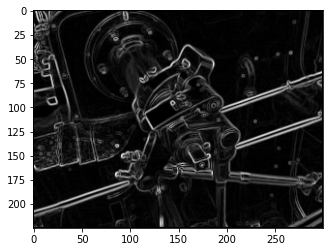

In [ ]:
import cv2
norm_image = cv2.normalize(sobel_matrix, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

norm_image = norm_image.astype(np.uint8)
plt.imshow(norm_image, cmap='gray')
print(norm_image)

**Others**

Read image using cv2

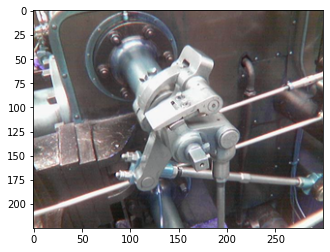

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path="/content/Valve_original.png"
img1= cv2.imread(image_path)
plt.imshow(img1)

Zero padding

In [ ]:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
k=6 # k/2 zeros rows in top , bottom, left and right
z=np.zeros(shape=(9,9))
z1=np.zeros(shape=(9,9))
z1[k//2:-(k//2), k//2:-(k//2)]=A

z1


array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 2., 3., 0., 0., 0.],
       [0., 0., 0., 4., 5., 6., 0., 0., 0.],
       [0., 0., 0., 7., 8., 9., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Striding

In [ ]:
nx,ny,nz = input_image.shape
sobel_matrix=np.zeros(shape=(nx,ny))
s=3 # striding
count_r=0
count_c=0
i=0

while(nx-2>i):
  j=0
  while(ny-2>j):
    gx=np.sum(np.multiply(gray_image[i:i+3,j:j+3],Gx))
    gy=np.sum(np.multiply(gray_image[i:i+3,j:j+3],Gy))
    r=np.sqrt(gx**2+gy**2)
    sobel_matrix[i+1,j+1]=r
    j=j+s
    count_c=count_c+1
  i=i+s
  count_r=count_r+1


#sobel_matrix
print(count_r)
print(count_c)
print(sobel_matrix.shape)
#plt.imshow(sobel_matrix, cmap='gray')
#print(sobel_matrix[4,:]) # to test




75
7500
(225, 300)
[0.         0.19415967 0.         0.         2.50468081 0.
 0.         1.28504422 0.         0.         0.20692327 0.
 0.         2.25594401 0.         0.         1.89260681 0.
 0.         1.03448366 0.         0.         1.01239622 0.
 0.         0.82895066 0.         0.         0.11522394 0.
 0.         0.05295317 0.         0.         0.18845832 0.
 0.         0.33637543 0.         0.         0.93744135 0.
 0.         0.79596024 0.         0.         0.16763423 0.
 0.         0.22628097 0.         0.         0.1759794  0.
 0.         0.10987113 0.         0.         0.04713248 0.
 0.         0.02243827 0.         0.         0.02805461 0.
 0.         0.04581789 0.         0.         0.05066482 0.
 0.         0.04617423 0.         0.         0.0328432  0.
 0.         0.04266141 0.         0.         1.08484496 0.
 0.         0.75444425 0.         0.         1.15224895 0.
 0.         0.40974105 0.         0.         1.83587249 0.
 0.         2.75010792 0.         0. 

Maxpooling

In [ ]:
A=np.array([[1,2,3,4],[4,5,6,4],[7,8,9,11],[3,4,5,6]])
nx,ny=A.shape
max_pool_mat=np.zeros(shape=(nx-1,ny-1))
for i in range (nx-1):
  for j in range (ny-1):
    r1=np.max(A[i:i+2,j:j+2])
    max_pool_mat[i,j]=r1

print(max_pool_mat)





[[ 5.  6.  6.]
 [ 8.  9. 11.]
 [ 8.  9. 11.]]


(225, 300)
(112, 150)


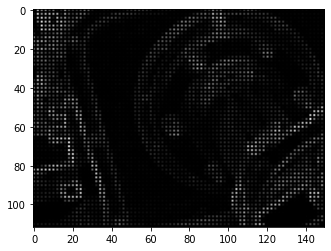

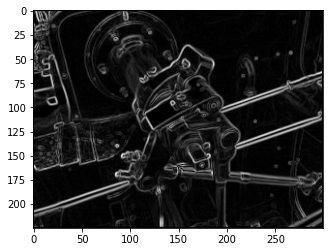

In [ ]:
nx,ny = sobel_matrix.shape
s=2
maxpool_matrix=np.zeros(shape=(((nx-2)//s+1),((ny-2)//s+1)))
nxm,nym=maxpool_matrix.shape
count_r=0
count_c=0

i=0
#for i in range(nx-1):
#  for j in range(ny-1):
while(nxm>i):
  j=0
  while(nym>j):
    r1=np.max(sobel_matrix[i:i+2,j:j+2])
    maxpool_matrix[i,j]=r1
    j=j+s
  i=i+s
    
#sobel_matrix
print(sobel_matrix.shape)
print(maxpool_matrix.shape)
plt.imshow(maxpool_matrix, cmap='gray')
plt.show()
plt.imshow(sobel_matrix, cmap='gray')
plt.show()



1. Convolution with striding
2. Max pooling convoluted image
3. One sample CNN    
https://keras.io/api/layers/convolution_layers/    
https://www.youtube.com/watch?v=1Ckh6Dd3S7g
3. Data augmentation example